In [1]:
import numpy as np
import matplotlib.pyplot as plt


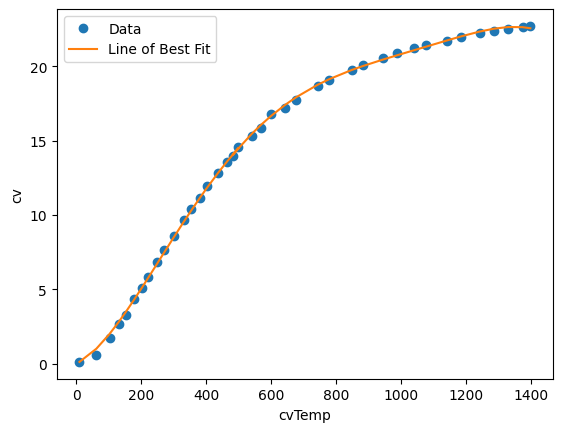

In [2]:


from scipy.optimize import curve_fit


import numpy as np

def CVlinear_func(x, a, b, c, d, e):
    return a * x**5 + b*x**4 + c*x**3 + d*x**2 + e*x

df = np.loadtxt('CVdata.txt')

cvTemp = []
cv = []
for i in range(0, len(df)):
    cvTemp.append(df[i, 0])
    cv.append(df[i, 1])

# Fit a line of best fit
CVpopt, pcov = curve_fit(CVlinear_func, cvTemp, cv)

# Get the optimized parameters
CVa, CVb, CVc, CVd, CVe = CVpopt

# Convert cvTemp to numpy array
cvTemp = np.array(cvTemp)

# Generate the line of best fit
line_of_best_fit = CVlinear_func(cvTemp, CVa, CVb, CVc, CVd, CVe)

# Plot the data points and the line of best fit
plt.plot(cvTemp, cv, 'o', label='Data')
plt.plot(cvTemp, line_of_best_fit, label='Line of Best Fit')
plt.xlabel('cvTemp')
plt.ylabel('cv')
plt.legend()
plt.show()


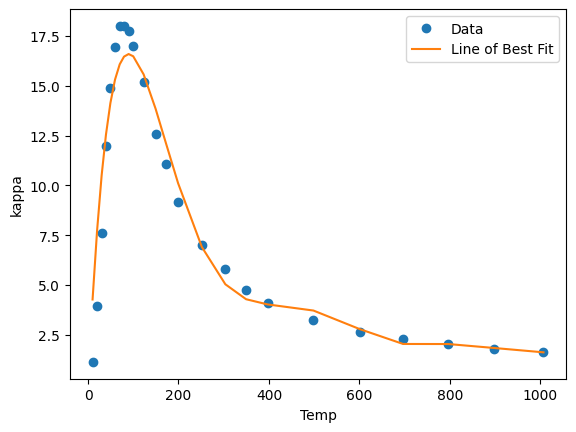

In [3]:
def linear_func(x, a, b, c, d, e, f, g):
    return a * x**7 + b*x**6 + c*x**5 + d*x**4 + e*x**3 + f*x**2 + g*x

df = np.loadtxt('Kappadata.txt')

kappaTemp = []
kappa = []
for i in range(0, len(df)):
    kappaTemp.append(df[i, 0])
    kappa.append(df[i, 1])

# Fit a line of best fit
popt, pcov = curve_fit(linear_func, kappaTemp, kappa)

# Get the optimized parameters
a, b, c, d, e, f, g  = popt

# Convert cvTemp to numpy array
kappaTemp = np.array(kappaTemp)

# Generate the line of best fit
line_of_best_fit = linear_func(kappaTemp, a, b, c, d, e, f, g)

# Plot the data points and the line of best fit
plt.plot(kappaTemp, kappa, 'o', label='Data')
plt.plot(kappaTemp, line_of_best_fit, label='Line of Best Fit')
plt.xlabel('Temp')
plt.ylabel('kappa')
plt.legend()
plt.show()

In [4]:
Cvmatch = CVlinear_func(kappaTemp, CVa, CVb, CVc, CVd, CVe)
rho = np.ones(len(kappaTemp))*2270
file = open("Tempdep.txt", "w")
for i in range(0, len(kappaTemp)):
    file.write(str(kappaTemp[i]) +" "+str(kappa[i])+" "+str(rho[i])+" " + str(Cvmatch[i]) + "\n")
file.close()